# Homework 7

October 29, 2020

##### (1) Find a few estimates (3 – 6) of effect size related to a project you would like to do. Preferably keep it simple: two groups or a regression. Use those estimates to calculate the needed sample size to achieve 80% power. Further, assume that the effect size estimates are inflated by 25% or 50% and show the effect on the number of subjects needed.

I'm interested in understanding how people associate pain with contexts. An experiment I'd like to run has people watch a movie while receiving painful thermal stimuli any time a specific location appears on screen. The rest of the time the participants will receive warm non-painful stimuli. Three studies published in (Wager, T. D., Atlas, L. Y., Lindquist, M. A., Roy, M., Woo, C. W., & Kross, E. (2013). An fMRI-based neurologic signature of physical pain. New England Journal of Medicine, 368(15), 1388–1397. https://doi.org/10.1056/NEJMoa1204471) provide effect sizes of a Pain vs. warm contrast. These effect sizes are 2.69, 1.54, and 1.64

In [2]:
library('bootES')
library('pwr')

Loading required package: boot


In [23]:
# calculate sample size based on 3 different effect sizes
ss_1 = pwr.t.test(n=, d=2.69, power=0.8,sig.level=.05, type='two.sample')
ss_2 = pwr.t.test(n=, d=1.54, power=0.8,sig.level=.05, type='two.sample')
ss_3 = pwr.t.test(n=, d=1.64, power=0.8,sig.level=.05, type='two.sample')

In [24]:
print(ss_1)
print(ss_2)
print(ss_3)


     Two-sample t test power calculation 

              n = 3.449776
              d = 2.69
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 7.708705
              d = 1.54
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 6.941919
              d = 1.64
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



In [4]:
#assume effect size is inflated by 50%
# calculate sample size based on 3 different effect sizes
ss_1_50 = pwr.t.test(n=, d=1.35, power=0.8,sig.level=.05, type='two.sample')
ss_2_50 = pwr.t.test(n=, d=0.77, power=0.8,sig.level=.05, type='two.sample')
ss_3_50 = pwr.t.test(n=, d=0.82, power=0.8,sig.level=.05, type='two.sample')

print(ss_1_50)
print(ss_2_50)
print(ss_3_50)


     Two-sample t test power calculation 

              n = 9.674702
              d = 1.35
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 27.4704
              d = 0.77
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


     Two-sample t test power calculation 

              n = 24.34452
              d = 0.82
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



##### (2) The enclosed dataset (h4.csv) is from a clinical trial testing the effectiveness of an intervention to educate patients with severe mental illness about the dangers of blood-borne diseases, particularly Hepatitis C and HIV, relative to a treatment as usual or control group. All clients were administered a test about Hep C before treatment and six months after treatment. The variable HCV_Know . . . . is the % change in test scores from baseline to six months. Did the experimental (STIRR) group learn more than the control group? Did either group show significant improvement?

In [34]:
h4 = read.csv('data_files/h4.csv')

In [35]:
head(h4)

group,hcvknowl,test
1,-16.66667,0
1,25.00000,0
1,25.00000,0
1,-16.66667,0
1,-16.66667,0
1,0.00000,0


In [36]:
# cast group as a factor
h4$group = as.factor(h4$group)

In [37]:
aggregate(hcvknowl~group, h4, mean)
aggregate(hcvknowl~group, h4, var)

group,hcvknowl
1,14.0186916
2,0.4340278


group,hcvknowl
1,401.7271
2,450.8330


It looks like the 2 groups have different means but their variance is rather similar, so I would use var.equal = T, but will run both ways here to see the difference

In [41]:
t.test(hcvknowl~group, data=h4, var.equal = T)
t.test(hcvknowl~group, data=h4, var.equal = F)


	Two Sample t-test

data:  hcvknowl by group
t = 4.6878, df = 201, p-value = 5.089e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.870491 19.298837
sample estimates:
mean in group 1 mean in group 2 
     14.0186916       0.4340278 



	Welch Two Sample t-test

data:  hcvknowl by group
t = 4.6731, df = 195.58, p-value = 5.514e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.851578 19.317750
sample estimates:
mean in group 1 mean in group 2 
     14.0186916       0.4340278 


Both tests showed a significant difference between the means of group 1 and group 2. This leads me to reject the null hypothesis that one group did not learn more than another group. The evidence supports the alternative hypothesis instead that experimental group did learn more than the control group.

In [76]:
#test both means against 0
t.test(h4[which(h4$group == 1),]$hcvknowl, mu=0)
t.test(h4[which(h4$group == 2),]$hcvknowl, mu=0)


	One Sample t-test

data:  h4[which(h4$group == 1), ]$hcvknowl
t = 7.2349, df = 106, p-value = 7.641e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 10.17713 17.86026
sample estimates:
mean of x 
 14.01869 



	One Sample t-test

data:  h4[which(h4$group == 2), ]$hcvknowl
t = 0.20028, df = 95, p-value = 0.8417
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -3.868143  4.736199
sample estimates:
mean of x 
0.4340278 


These one sample t-tests indicate that the control group did not show significant improvement. The intervention group did show a significant difference, although this does not tell us if the intervention group was significantly different from the control group. That question is answered by the original 2 sample t-test.

##### (3) The enclosed data (class_screens.csv) are from a study in which therapists were encouraged to administer a new PTSD test to troubled children (you saw a ‘subset’ of these data in Homework 4). The numbers are the number of tests administered. There were two groups: an experimental group (L) who received focused training on the need to consider PTSD in troubled children and a control group (W) without special training on the importance of PTSD. Was there a significant difference between groups, think carefully?

In [2]:
cs = read.csv('data_files/class_screens.csv')

In [78]:
head(cs)

CONDTION,NUM_SCREENS
L,1
L,4
W,0
L,0
L,3
L,0


In [85]:
dim(cs)

[1] 129   2

In [4]:
# cast condition as a factor
cs$condition = as.factor(cs$CONDTION)

aggregate(NUM_SCREENS~condition, data=cs, mean)
aggregate(NUM_SCREENS~condition, data=cs, var)

condition,NUM_SCREENS
L,6.985294
W,2.327869


condition,NUM_SCREENS
L,555.71620
W,80.92404


From this we can see that the variance of the counts exceeds the mean of the counts, so it is inappropriate to use the poisson distribution here. Instead I will use the negative binomial distribution.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.783   1.000 176.000 

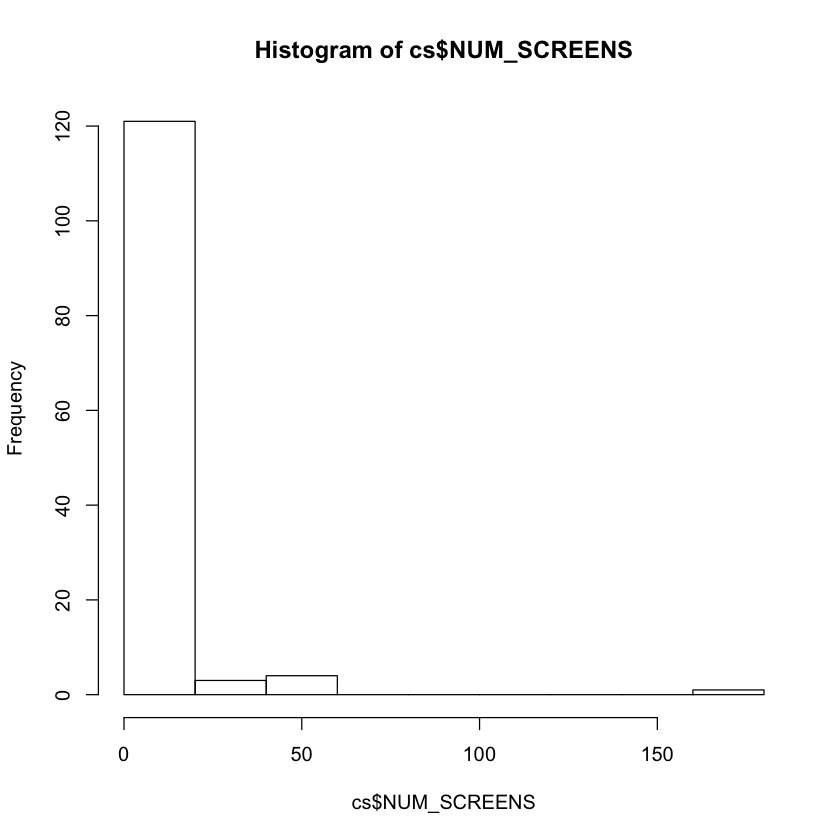

In [92]:
hist(cs$NUM_SCREENS)
summary(cs$NUM_SCREENS)

In [6]:
# fit glm for negative binomial distributions
library(MASS)
nb = glm.nb(NUM_SCREENS~condition, data=cs)
summary(nb)


Call:
glm.nb(formula = NUM_SCREENS ~ condition, data = cs, init.theta = 0.1159201156, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9768  -0.9768  -0.8407  -0.2495   2.1948  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9438     0.3591   5.413 6.21e-08 ***
conditionW   -1.0989     0.5267  -2.086    0.037 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.1159) family taken to be 1)

    Null deviance: 92.753  on 128  degrees of freedom
Residual deviance: 88.657  on 127  degrees of freedom
AIC: 453.4

Number of Fisher Scoring iterations: 1


              Theta:  0.1159 
          Std. Err.:  0.0208 

 2 x log-likelihood:  -447.4040 

In [9]:
# compare against poisson just for fun
poisson = glm(NUM_SCREENS~condition, data = cs,  family = poisson())
summary(poisson)


Call:
glm(formula = NUM_SCREENS ~ condition, family = poisson(), data = cs)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-3.738  -3.738  -2.158  -1.703  28.245  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.94381    0.04588   42.36   <2e-16 ***
conditionW  -1.09885    0.09564  -11.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2636.8  on 128  degrees of freedom
Residual deviance: 2481.5  on 127  degrees of freedom
AIC: 2638.6

Number of Fisher Scoring iterations: 7


We can see from the huge reduction in AIC from 2638 in the poisson model to 453 in the negative binomial model that the negative binomial is a better fit. Further, in the negative binomial model the main effect of condition was significant at p = 0.037, so I reject the null hypothesis that the number of PTSD screens was the same between groups.